<a href="https://colab.research.google.com/github/ulugeyik/toucanpi/blob/main/toucanpiISSdata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#26/05/2022 Received AstroPi data from ISS. 
#This notebook is for carrying out general analysis of the data, getting an overview
# ToucanPi Team.

In [ ]:
#the following part is needed in order to upload a data file.
#it requires that I turn on third part cookies
#solution: https://github.com/googlecolab/colabtools/issues/17
#once it has been uploaded I can comment it out.
#info: https://medium.com/towards-data-science/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#from google.colab import files
#uploaded = files.upload()


In [ ]:
#for loading data on google collaboratory
import pandas as pd
import io
mydata = pd.read_csv(io.BytesIO(uploaded['toucandata_20220513_201103.csv']),parse_dates={ 'newdate': ['Date/Time'] })


In [ ]:
#for maths,plots and other things
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math

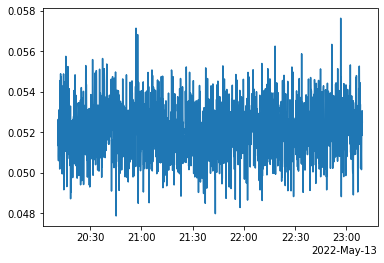

In [8]:
#Note: to make a .gif of the images
#ffmpeg  -framerate 10 -pattern_type glob -i '*.jpg' -r 15 -vf scale=512:-1 out.gif


#plot acceleration, acceleration intensity of the axis in Gs.
plt.figure()
plt.plot(mydata.newdate,np.sqrt(np.square(mydata.AccX)+np.square(mydata.AccY)+np.square(mydata.AccZ)))
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



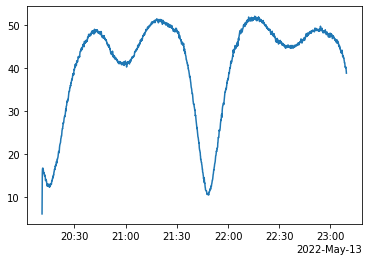

In [9]:
#plot magnetic field, microTesla's
plt.figure()
plt.plot(mydata.newdate,np.sqrt(np.square(mydata.MagnetX)+np.square(mydata.MagnetY)+np.square(mydata.MagnetZ)))
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


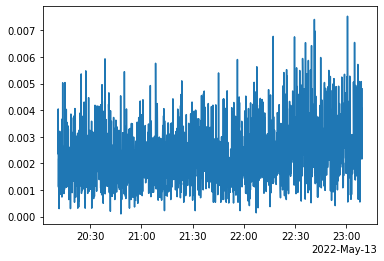

In [10]:

#plot gyro data, radians/second ("rotational intensity")
plt.figure()
plt.plot(mydata.newdate,np.sqrt(np.square(mydata.GyroX)+np.square(mydata.GyroY)+np.square(mydata.GyroZ)))
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



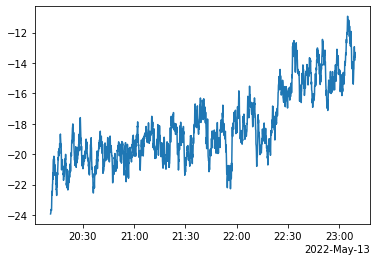

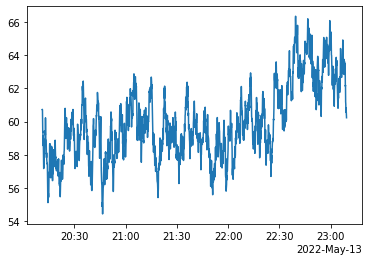

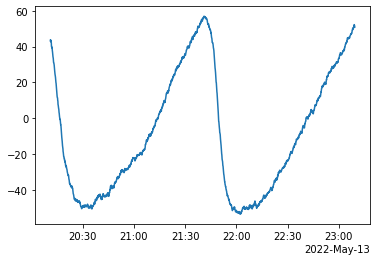

In [12]:
#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientPitch*180.0 / math.pi)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientRoll*180.0 / math.pi)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientYaw*180.0 / math.pi)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



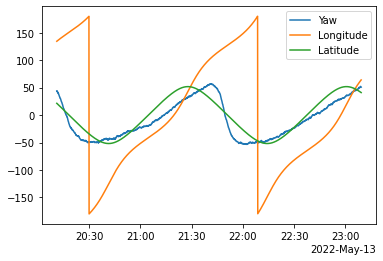

In [13]:

#yaw contains the most interesting information.
#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientYaw*180.0 / math.pi, label='Yaw')
plt.plot(mydata.newdate,mydata.Long,label='Longitude')
plt.plot(mydata.newdate,mydata.Lat,label='Latitude')
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().legend()
plt.show()


In [14]:

#show location, possibly wrong:
#to plot things on a world map, interactive, may be incorrect.
import plotly.express as px
fig = px.scatter_geo(mydata,lat=mydata.Lat,lon=mydata.Long)
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()
